In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from newdust.extinction import scatmodels
from newdust.graindist import composition

from scipy.integrate import trapz

In [3]:
ENERGY = np.logspace(-1,2,100) # keV
AUM    = np.array(1.0) # um
AUM_CM = AUM * (1.e-6 *100.) # cm
CM     = composition.CmDrude()
CMS    = composition.CmSilicate()
#THETA  = np.logspace(-10.0, np.log10(np.pi), 1000) # radians
#THETA_ASEC = THETA * (360.*60.*60)/(2.*np.pi)

VLAM  = 4500. # angs

THETA_RAD  = np.logspace(-5., np.log10(np.pi), 1000)
THETA_ASEC = THETA_RAD * (360.0*60.*60.) / (2.0*np.pi)

In [4]:
rgd = scatmodels.RGscat()
rgd.calculate(ENERGY, AUM, CM, unit='kev')

[]

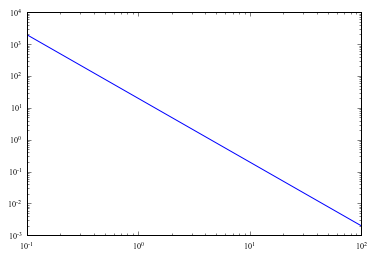

In [5]:
plt.plot(ENERGY, rgd.qsca)
plt.loglog()

In [6]:
rgd2 = scatmodels.RGscat()
rgd2.calculate(ENERGY, AUM, CM, unit='kev', theta=THETA_ASEC)

In [7]:
np.shape(rgd2.qsca)

(100, 1)

In [8]:
np.shape(rgd2.diff)

(100, 1, 1000)

[]

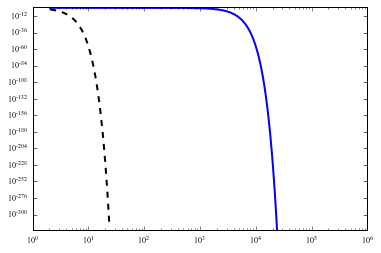

In [9]:
plt.plot(THETA_ASEC, rgd2.diff[0,0,:], 'b-', lw=2)
plt.plot(THETA_ASEC, rgd2.diff[-1,0,:], 'k--', lw=2)
plt.loglog()

In [10]:
from scipy.integrate import trapz

In [11]:
sigma_sca = rgd2.qsca[0,0] * np.pi * AUM_CM**2  # cm^2
test = trapz(rgd2.diff[0,0,:] * 2.0*np.pi*np.sin(THETA_RAD), THETA_RAD)

In [12]:
print(test/sigma_sca)

1.04303884915


## Mie model

In [13]:
mtest = scatmodels.Mie()
mtest.calculate(VLAM, AUM, CMS, unit='angs', theta=THETA_ASEC)

//anaconda/lib/python2.7/site-packages/newdust-0.1-py2.7.egg/newdust/extinction/scatmodels/miescat.py:201: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  d_n = d[:,:,n]


In [16]:
np.shape(mtest.diff)

(1, 1, 1000)

(100000.0, 1000000.0)

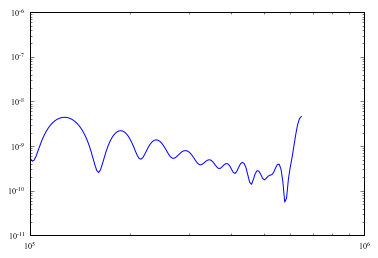

In [17]:
plt.plot(THETA_ASEC, mtest.diff[0,0,:])
plt.loglog()
plt.xlim(1.e5, 1.e6)

In [18]:
trapz(mtest.diff * 2.0*np.pi*np.sin(THETA_RAD), THETA_RAD)

array([[  4.25357678e-08]])

In [19]:
mtest.qsca * np.pi * (AUM_CM)**2

array([[  4.25384870e-08]])

### Test multi-dimensional input

In [31]:
AUM2  = np.array([0.01, 0.1, 1.0]) # um
VLAM2 = np.array([3500.,4000.,4500.,5000.]) # angs

In [32]:
mtest2 = scatmodels.Mie()
mtest2.calculate(VLAM2, AUM2, CMS, unit='angs', theta=THETA_ASEC)

[]

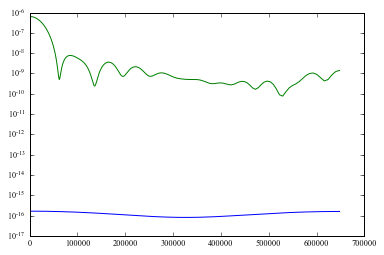

In [35]:
plt.plot(THETA_ASEC, mtest2.diff[0,0,:])
plt.plot(THETA_ASEC, mtest2.diff[-1,-1,:])
plt.semilogy()

In [36]:
trapz(mtest2.diff[0,0,:] * 2.0*np.pi*np.sin(THETA_RAD), THETA_RAD)

1.3486169944719051e-15

In [38]:
mtest2.qsca[0,0] * np.pi * (AUM2[0] * 1.e-4)**2

1.3487122839277368e-15

In [39]:
trapz(mtest2.diff[-1,-1,:] * 2.0*np.pi*np.sin(THETA_RAD), THETA_RAD)

5.2028286406948396e-08

In [41]:
mtest2.qsca[-1,-1] * np.pi * (AUM2[-1] * 1.e-4)**2

5.2028088894572535e-08